<a href="https://colab.research.google.com/github/mayankraj25/SciKit-Learn/blob/main/SciKit2(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

iris=datasets.load_iris();
X=iris.data
y=iris.target
print(X.shape)
print(y.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

(150, 4)
(150,)


In [35]:
from sklearn import svm
from sklearn import metrics
model=svm.SVC()
model.fit(X_train,y_train)
print(model)
predictions=model.predict(X_test)
print("Pridictions : ",predictions)
accuracy=metrics.accuracy_score(y_test,predictions)
print("Test Accuracy : ",accuracy)
#This is the training accuracy
test_accuracy=model.score(X_train,y_train)
print("Train Accuracy :",test_accuracy)
classes = iris.target_names
for i in range(len(prediction)):
    print(classes[prediction[i]])
'''**If training accuracy is high (e.g., ~1.0) and test accuracy is lower (e.g., ~0.75), your model might be overfitting.**'''

SVC()
Pridictions :  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Test Accuracy :  1.0
Train Accuracy : 0.975
versicolor
setosa
virginica
versicolor
versicolor
setosa
versicolor
virginica
versicolor
versicolor
virginica
setosa
setosa
setosa
setosa
versicolor
virginica
versicolor
versicolor
virginica
setosa
virginica
setosa
virginica
virginica
virginica
virginica
virginica
setosa
setosa


'**If training accuracy is high (e.g., ~1.0) and test accuracy is lower (e.g., ~0.75), your model might be overfitting.**'

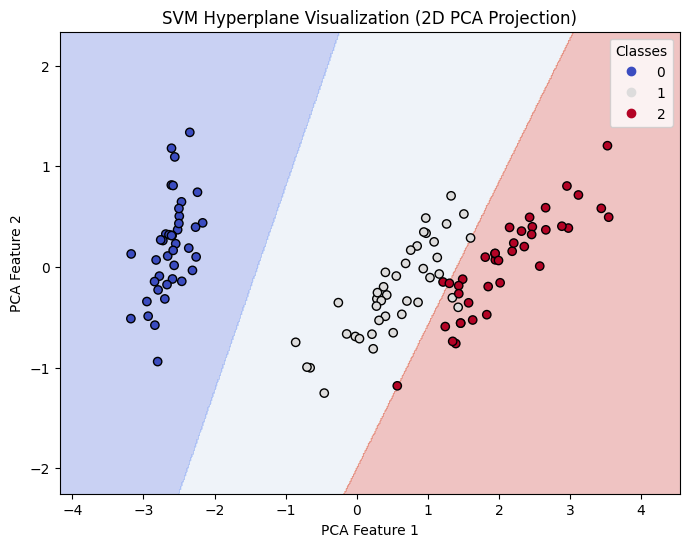

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# --- PCA + Visualization ---
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Train a new SVC on 2D projected data
model_2d = svm.SVC(kernel='linear')
model_2d.fit(X_train_2d, y_train)

# Create a mesh grid for decision function
# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict class for each point in grid
Z = model_2d.predict(grid)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')

plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("SVM Hyperplane Visualization (2D PCA Projection)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()